# Decision Tree Implementation

### Import required libraries

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Loading the dataset

In [65]:
seeds_dataset = pd.read_csv("seeds_dataset.csv")

### Data analysis and cleaning

In [66]:
seeds_dataset.head()

,area,perimeter,compactness,length,width,asymmetry,groove_length,LABEL
0,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,Canadian
1,13.07,13.92,0.8480,5.472,2.994,5.304,5.395,Canadian
2,10.59,12.41,0.8648,4.899,2.787,4.975,4.794,Canadian
3,11.82,13.40,0.8274,5.314,2.777,4.471,5.178,Canadian
4,12.11,13.27,0.8639,5.236,2.975,4.132,5.012,Canadian


In [67]:
seeds_dataset.shape

(90, 8)

In [68]:
seeds_dataset.dtypes

area             float64
perimeter        float64
compactness      float64
length           float64
width            float64
asymmetry        float64
groove_length    float64
LABEL             object
dtype: object

In [69]:
seeds_dataset.isnull().sum()

area             0
perimeter        0
compactness      0
length           0
width            0
asymmetry        0
groove_length    0
LABEL            0
dtype: int64

In [70]:
seeds_dataset.describe()

,area,perimeter,compactness,length,width,asymmetry,groove_length
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,14.922333,14.585556,0.871433,5.636878,3.268422,3.659169,5.409122
std,3.022909,1.332049,0.026874,0.437506,0.399180,1.506971,0.475133
min,10.590000,12.410000,0.808200,4.899000,2.630000,0.765100,4.605000
25%,12.207500,13.452500,0.856475,5.285250,2.909500,2.317750,5.069250
50%,14.610000,14.360000,0.877100,5.555500,3.263000,3.390000,5.226000
75%,17.045000,15.602500,0.890300,5.925250,3.561750,4.833000,5.826500
max,21.180000,17.250000,0.918300,6.579000,4.033000,8.315000,6.451000


In [71]:
seeds_dataset["LABEL"].value_counts()

LABEL
Canadian    30
Kama        30
Rosa        30
Name: count, dtype: int64

The dataset is clean with no null and missing values

### Encoding the target variable

In [72]:
le = LabelEncoder()
seeds_dataset['LABEL'] = le.fit_transform(seeds_dataset['LABEL'])

In [73]:
X = seeds_dataset.drop("LABEL", axis=1)
y = seeds_dataset["LABEL"]

### Train and test data split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [75]:
X_train_df = pd.DataFrame(X_train, columns=seeds_dataset.columns[:-1])
X_test_df = pd.DataFrame(X_test, columns=seeds_dataset.columns[:-1])
y_train_df = pd.DataFrame(y_train, columns=["Label"])
y_test_df = pd.DataFrame(y_test, columns=["Label"])

In [76]:
print("Formatted Training Data:")
print(X_train_df.head())

print("\n Training Labels:")
print(y_train_df.head())

print("\n Formatted Testing Data:")
print(X_test_df.head())

print("\n Testing Labels:")
print(y_test_df.head())

Formatted Training Data:
     area  perimeter  compactness  length  width  asymmetry  groove_length
9   12.26      13.60       0.8333   5.408  2.833      4.756          5.360
15  11.02      13.00       0.8189   5.325  2.701      6.735          5.163
76  20.16      17.03       0.8735   6.513  3.773      1.910          6.185
22  12.19      13.36       0.8579   5.240  2.909      4.857          5.158
49  14.99      14.56       0.8883   5.570  3.377      2.958          5.175

 Training Labels:
Empty DataFrame
Columns: [Label]
Index: []

 Formatted Testing Data:
     area  perimeter  compactness  length  width  asymmetry  groove_length
71  17.12      15.55       0.8892   5.850  3.566      2.858          5.746
10  11.55      13.10       0.8455   5.167  2.845      6.715          4.956
44  12.36      13.19       0.8923   5.076  3.042      3.220          4.605
39  13.89      14.02       0.8880   5.439  3.199      3.986          4.738
74  15.38      14.90       0.8706   5.884  3.268      4.462   

### Decision tree implementation

In [77]:
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [78]:
y_pred = decision_tree_model.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9444444444444444


In [80]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         6

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



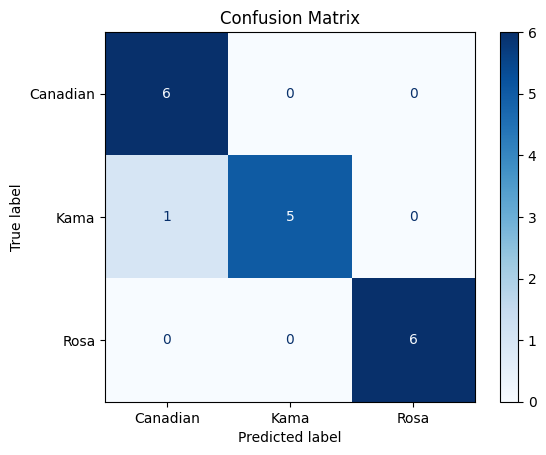

In [81]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [82]:
comparison_df = pd.DataFrame({
    'Actual Label': y_test.values,
    'Predicted Label': y_pred
}).reset_index(drop=True)

print("\n Comparison of Actual vs Predicted Labels:\n")
print(comparison_df)



 Comparison of Actual vs Predicted Labels:

    Actual Label  Predicted Label
0              2                2
1              0                0
2              1                1
3              1                1
4              2                2
5              1                1
6              0                0
7              2                2
8              2                2
9              0                0
10             0                0
11             0                0
12             1                0
13             2                2
14             2                2
15             1                1
16             0                0
17             1                1


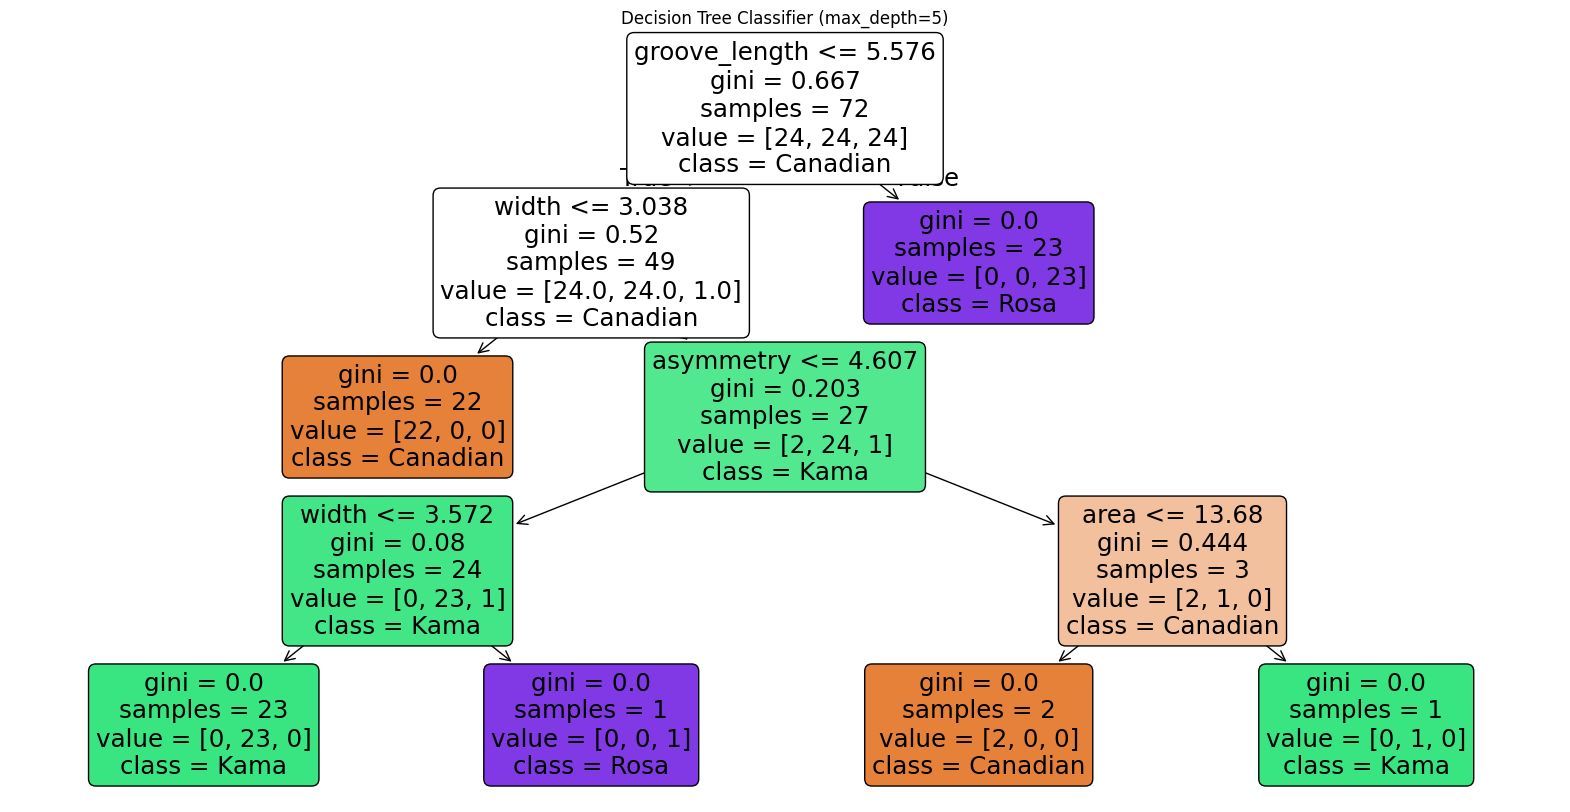

In [83]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Decision Tree Classifier (max_depth=5)")
plt.show()

The tree first checks the length of the groove to form an initial split. Then the seeds with a longer groove length are classified as Rosa straight away, and the rest are further divided on the basis of properties like width and asymmetry. These splits separate the seeds as Canadian and Kama with good accuracy. The tree is open,with depth 5 making it easily interpretable from the tree visual.


In [84]:
new_vector = np.array([[17.2, 15.6, 0.88, 6.1, 3.6, 4.5, 5.9]])
predicted_class = decision_tree_model.predict(new_vector)[0]

print("\nNew Test Vector:", new_vector.flatten())
print("Predicted Class for New Vector:", predicted_class)


New Test Vector: [17.2  15.6   0.88  6.1   3.6   4.5   5.9 ]
Predicted Class for New Vector: 2


/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Tested the model on a new seed sample The decision tree has categorized this sample under class 2. From the sample data, grovve_length is 5.9 which is greater than 5.576 so according to the tree we can say that it gets classified as rosa. and that's the output given by model too.